In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
dfZillowData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') # read in the csv file

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Show headers and first 10 records of the data set 
dfZillowData.head(10)



In [ ]:
dfZillowData.info(15)



[<matplotlib.text.Text at 0x1196bd650>, <matplotlib.text.Text at 0x11a706110>]

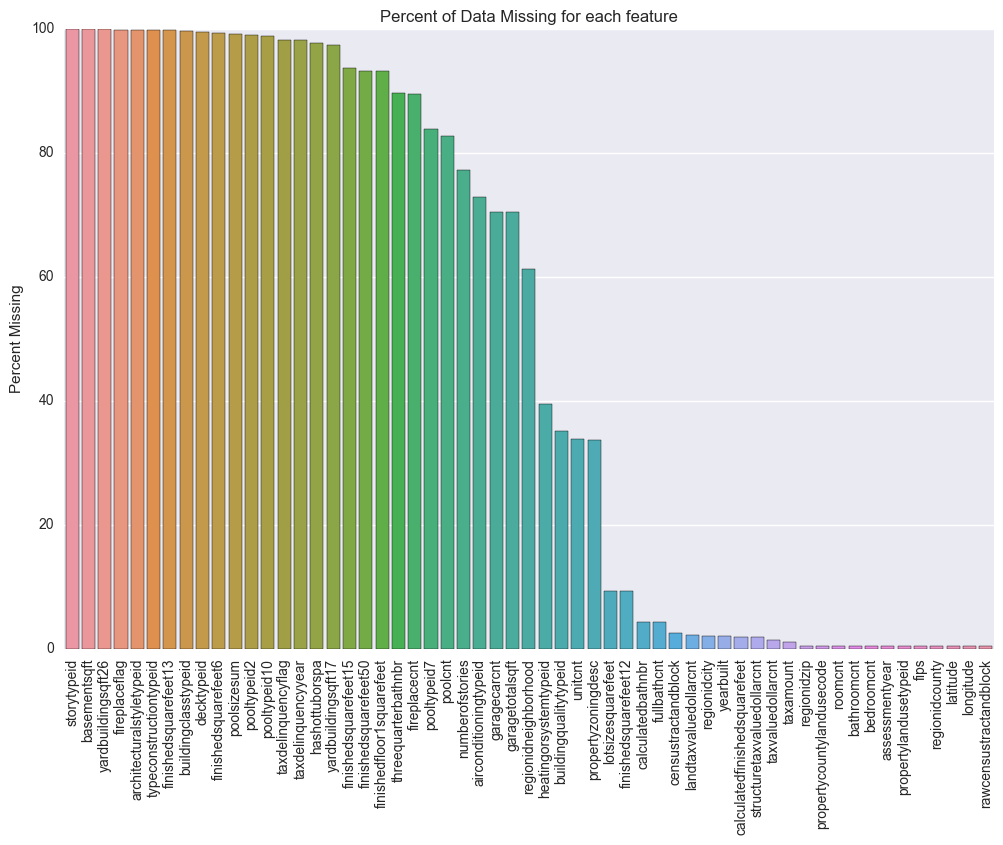

In [4]:
#Look to see if there are any missing values in data frame
dfZillowData.isnull().values.any()

#Find all columns with missing data 
MissingZillowData = (dfZillowData.isnull().sum() / len(dfZillowData)) * 100

#Remove all Columns with a value equal to 0 and short data
MissingZillowData = MissingZillowData.drop(MissingZillowData[MissingZillowData == 0].index).sort_values(ascending=False)

#Create Graph that shows the missing data
#Set Color palette to standard
color = sb.color_palette()

#set up Figure size
f, ax = plt.subplots(figsize=(12, 8))

#Rotate lables
plt.xticks(rotation='90')

#Add Bar Plots
sb.barplot(x=MissingZillowData.index, y=MissingZillowData)

#Add Titles to Graph
ax.set(title='Percent of Data Missing for each feature', ylabel='Percent Missing')

In [12]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Remote Null values that are created by import
df = dfZillowData.replace(to_replace='NaN',value= np.nan) 

#Descriptive stats for Zillow Dat set
#df.describe() 

# We may want to stop this we should probably go through and just pick a few columns
# and fill in the null values for the columns that have missing values 
dfZillowDataUpdated = df.fillna(df.median()) 

#Show top 15 column data types
dfZillowDataUpdated.describe()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2985217.0,...,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,1.332586e+07,1.253134e+00,7.000411e+00,5.340616e+02,2.208340e+00,3.088608e+00,3.998841e+00,6.210886e+00,2.286339e+00,66.0,...,1.680978e+02,1.964236e+03,1.091727e+00,1.699941e+05,4.188485e+05,2.014999e+03,2.505395e+05,5.363100e+03,1.399796e+01,6.048158e+13
std,7.909966e+06,1.693104e+00,1.101467e-01,1.285160e+01,1.075760e+00,1.273421e+00,3.716363e-02,1.566111e+00,9.807784e-01,0.0,...,1.148674e+01,2.320551e+01,3.079103e-01,3.984014e+05,7.212790e+05,3.676099e-02,4.401196e+05,9.136004e+03,3.552654e-01,3.212398e+11
min,1.071172e+07,1.000000e+00,2.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,66.0,...,1.000000e+01,1.801000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000e+00,-1.000000e+00
25%,1.164371e+07,1.000000e+00,7.000000e+00,5.340000e+02,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,66.0,...,1.680000e+02,1.950000e+03,1.000000e+00,7.564100e+04,1.817350e+05,2.015000e+03,7.710000e+04,2.478050e+03,1.400000e+01,6.037401e+13
50%,1.254509e+07,1.000000e+00,7.000000e+00,5.340000e+02,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00,2.000000e+00,66.0,...,1.680000e+02,1.963000e+03,1.000000e+00,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,1.400000e+01,6.037572e+13
75%,1.409712e+07,1.000000e+00,7.000000e+00,5.340000e+02,3.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00,3.000000e+00,66.0,...,1.680000e+02,1.981000e+03,1.000000e+00,1.947780e+05,4.840000e+05,2.015000e+03,3.022000e+05,6.166200e+03,1.400000e+01,6.059042e+13
max,1.696019e+08,1.300000e+01,2.700000e+01,8.516000e+03,2.000000e+01,2.000000e+01,5.000000e+00,1.200000e+01,2.000000e+01,66.0,...,6.141000e+03,2.015000e+03,4.100000e+01,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,9.900000e+01,4.830301e+14


In [13]:
#Find the median value from the original data set 
yearBuiltMedian = df['yearbuilt'].median()

#Find the number of homes that have a build year of 0 or a value greater than 2018
dfZillowData[(dfZillowData['yearbuilt']==0) | (dfZillowData['yearbuilt'] > 2018)]


#Update all records with 0 to have the median Year Built
#dfRussianDataUpdated.loc[(dfRussianDataUpdated['yearbuilt'] == 0)] = yearBuiltMedian

#Update all Recores with a build greater than 2018 
#dfRussianDataUpdated.loc[(dfRussianDataUpdated['yearbuilt'] > 2018)] = yearBuiltMedian

#dfRussianDataUpdated['build_year'].describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock


In [16]:
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfZillowDataUpdated)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])
    
#Create Object only Datafram
dfZillowDataCat = dfDataTypes.select_dtypes(['object'])


#Complete PCA to help with eliminating variables 
#Using only numeric Data
ZillowDataPCA = dfZillowDataNumeric

pca = PCA(n_components=30)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowDataPCA).transform(ZillowDataPCA) # fit data and then transform it

print ((pca.explained_variance_ratio_) * 100)

#print(pca.components_)

#pca.components_.head()

# Using custom Function from Dr Parson's Unit 3 diminsion reduction example
# this function definition just formats the weights into readable strings
# Updated the Function to have 8 decimal points instead of the 2 from the original
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.8f*%s ' % (comp[fidx],f[:-11])
        tmp_array.append(tmp_string)
    return tmp_array
  
pca_weight_strings = get_feature_names_from_weights(pca.components_, dfZillowDataNumeric.columns.values) 

#print(pca_weight_strings)

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(ZillowDataPCA_pca,columns=[pca_weight_strings])

#output data to a csv file for additional review.
#We dont want to do this as it creates a CSV that is almost 3 million records :-()
#df_pca.to_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/out.csv', sep=',')


[  9.99999999e+01   5.99587966e-08   7.57273209e-10   1.39808908e-10
   1.00072643e-10   8.83838371e-11   3.42745524e-11   1.67362499e-11
   1.12002192e-11   2.43269813e-12   9.53331166e-14   1.28961391e-14
   1.11710299e-14   3.23276028e-15   1.01313231e-15   4.78946780e-16
   1.11155799e-16   5.36616396e-17   1.45757339e-17   5.97425583e-18
   1.36445551e-18   7.01779563e-19   3.98310662e-19   3.40642422e-19
   3.23097353e-19   1.77763132e-19   1.59099547e-19   1.26430151e-19
   6.04007688e-21   3.28799639e-21]
